# Guide to Using Python to Accompany Business Analytics by Jaggia et al.
## Chapter 3
##### Prepared by David G. Dobolyi at the University of Notre Dame

### Table of Contents

- [Example 3.1](#Example-3.1)
- [Example 3.2](#Example-3.2)
- [Example 3.3](#Example-3.3)
- [Example 3.4](#Example-3.4)
- [Example 3.5](#Example-3.5)
- [Example 3.6](#Example-3.6)
- [Example 3.7](#Example-3.7)
- [Example 3.8](#Example-3.8)
- [Example 3.9](#Example-3.9)
- [Example 3.13](#Example-3.13)
- [Example 3.14](#Example-3.14)

### Example 3.1

Recently, an urban university conducted a transportation survey as part of its commitment to reduce its carbon footprint and comply with the federal Clean Air Act. The survey was distributed to students, faculty, and staff members in order to learn the patterns of their daily commute. One of the questions asked: During a typical school week, how do you commute from home to school. Possible responses included Drive_Alone, Public_Transit, Bicycle, Walk, and Other. Six hundred people responded to the survey. Table 3.4 shows a portion of the survey results.

| Table 3.4 Transit_Survey Data |
| --- |

| Respondent | Sqft |
| --- | --- |
| 1 | Bicycle |
| 2 | Public_Transit |
| ... | ... |
| 600 | Walk |

Construct a frequency distribution and a bar chart using Python and summarize the results.

#### Solution

As mentioned in Chapter 2, before following all Python instructions, make sure that you have read Appendix X ("Getting Started in Python"). We assume that you have downloaded Python and Jupyter Lab and that you know how to import an Excel file (including installing necessary packages such as `pandas` and `xlrd`). Throughout the text, our goal is to provide the simplest way to obtain the relevant output. We denote all function, method, and property names in **boldface** and all options within functions in *italics*.

**a.** Import the ***Transit_Survey*** data into a Pandas DataFrame (table) and label it myData.

In [1]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch03_data.xlsx', sheet_name = 'Transit_Survey')

myData.head()

Mode of Transportation
0                Bicycle
1         Public_Transit
2                Bicycle
3                Bicycle
4         Public_Transit

**b.** We use the Pandas **value_counts** function to create a frequency distribution labeled Frequency.

In [2]:
Frequency = myData['Mode of Transportation'].value_counts()

Frequency

Public_Transit    273
Walk              141
Bicycle           111
Drive_Alone        57
Other              18
Name: Mode of Transportation, dtype: int64

The only difference in the frequency distribution that Python produces compared to the one that appears in Table 3.5 in the text is that the frequencies are arranged in descending order by default (although this can be manipulated using arguments to **value_counts** such as *sort* and *ascending*).

**c.** We use seaborn's **barplot** function to construct a bar chart, using the *x* and *y* arguments to set up the axes with the computed values and names of the indicies, respectively. We also use the **set** function to adjust the range of the x-axis and the x-axis label using the arguments *xlim* and *xlabel*, respectively. Note that the semi-colon is included on the final line of code to avoid printing unnecessary output above the plot in our Jupyter Notebook (for an alternative approach, see code using **show** below).

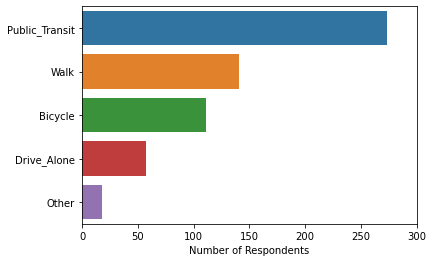

In [3]:
import seaborn as sns

ax = sns.barplot(x = Frequency.values, 
                 y = Frequency.index)

ax.set(xlim = (0, 300), 
       xlabel = 'Number of Respondents');

There are a few differences in the bar chart that Python produces compared to the one that appears in Figure 3.2, but these differences are cosmetic.

### Example 3.2

The value variable from the introductory case shows annual returns (in \%) for Fidelity's Value mutual fund from 1984 through 2018. Construct a frequency distribution and a histogram using Python and then summarize the results.

#### Solution

Before using Python, we need to make some decisions about the number of intervals, as well as the width of each interval. For a variable with 35 observations, it would be reasonable to use five intervals. We then find that the minimum and the maximum observations for the Value variable are -46.52 and 44.08, respectively. Using the formula to approximate the interval width, we calculate $(44.08 -(-46.52))/5 = 18.12$. It would be perfectly acceptable to construct for instance, a frequency distribution with five intervals where each interval has a width of 20, and the lower limit of the first interval is -50. However, because one of our objectives is to compare the Growth returns with the Value returns, we use the same number of intervals, same width, and same lower limit as we did when we constructed the frequency distribution for Growth; that is, we use six intervals, each with a width of 25, and the first interval has a lower limit of -50.

**a.** Import the ***Growth_Value*** data into a Pandas DataFrame (table) and label it myData.

In [4]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch03_data.xlsx', sheet_name = 'Growth_Value')

myData.head()

Year  Growth  Value
0  1984   -5.50  -8.59
1  1985   39.91  22.10
2  1986   13.03  14.74
3  1987   -1.70  -8.58
4  1988   16.05  29.05

**b.** We first define the intervals using NumPy's **linspace** function, setting the *start* and *stop* to -50 and 100, respectively, and the *num* to the number of desired bins + 1 (i.e., 7):

In [5]:
import numpy as np

intervals = np.linspace(start = -50, stop = 100, num = 7)

intervals

array([-50., -25.,   0.,  25.,  50.,  75., 100.])

Alternatively, we could have also used NumPy's **arange** function, albeit this function does not return the stop value and can have issues returning the expected sequence due to how calculations vary based on floating point precision. For instance, we could enter:

In [6]:
intervals = np.arange(start = -50, stop = 100 + 25, step = 25) # note we add 25 to the stop because stop is not inclusive

intervals

array([-50, -25,   0,  25,  50,  75, 100])

**c.** We use seaborn's **distplot** function to construct a histogram, setting the *bins* to our intervals, *kde* (kernel density estimate) to `False`, and *hist_kws* to a dictionary of settings that better match Figure 3.6 in terms of the bars' borders (i.e., using white *edgecolor* and an *alpha* of 1, which removes transparency). In addition, we once again use the **set** function to adjust the *xticks* to match our calculated intervals and to set the *xlabel* and *ylabel*. Finally, we use **yaxis.set_major_locator** to adjust the y-axis ticks to appear as integers (i.e., with the imported **MaxNLocator** function adjusted to set *integer* to `True`) since otherwise the default will include fractional values.

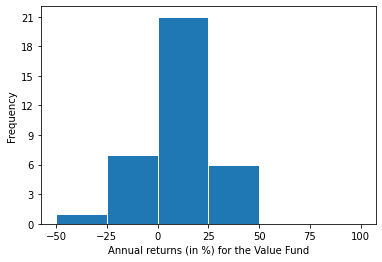

In [7]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator

ax = sns.distplot(myData.Value, 
                  bins = np.linspace(-50, 100, 7), 
                  kde = False, 
                  hist_kws = dict(edgecolor = "white", alpha = 1))

ax.set(xticks = intervals, 
       xlabel = 'Annual returns (in %) for the Value Fund', 
       ylabel = 'Frequency')

ax.yaxis.set_major_locator(MaxNLocator(integer = True))

The histogram Python produces is comparable to Figure 3.6 in the text.

### Example 3.3

An online retailer recently sent e-mails to customers that included a promotional discount. The retail wonders whether there is any relationship between a customer's location in the U.S. (Midwest, Northeast, South, or West) and whether the customer made a purchase with the discount (yes or no). Table 3.10 shows a portion of the results from 600 e-mail accounts.

| Table 3.10 Location and Purchase Survey Responses |
| --- |

| Email | Location | Purchase |
| --- | --- | --- |
| 1 | West | yes |
| 2 | Northeast | yes |
| ... | ... | ... |
| 600 | South | no |

Construct a contingency table and a stacked column chart using Python and then summarize the results.

**a.** Import the ***Promotion*** data into a Pandas DataFrame (table) and label it myData.

In [8]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch03_data.xlsx', sheet_name = 'Promotion')

myData.head()

Email Purchase   Location
0      1      yes       West
1      2      yes  Northeast
2      3      yes  Northeast
3      4       no    Midwest
4      5       no  Northeast

**b.** In order to create a contigency table, we use the Pandas **crosstab** function and specify the *index* as our row variable and the *columns* as our column variable (i.e., Location and Purchase, respectively). In addition, we set *margins* to `True` to show the calculated margins.

In [9]:
pd.crosstab(index = myData.Location, 
            columns = myData.Purchase, 
            margins = True)

Purchase    no  yes  All
Location                
Midwest    107   77  184
Northeast   41  102  143
South       24  130  154
West        18  101  119
All        190  410  600

This table is equivalent to Table 3.11 shown in the text.

In addition, we can set the *normalize* argument to `'all'` to show the percentages:

In [10]:
myProps = pd.crosstab(index = myData.Location, 
                      columns = myData.Purchase, 
                      margins = True, 
                      normalize = 'all')

myProps

Purchase         no       yes       All
Location                               
Midwest    0.178333  0.128333  0.306667
Northeast  0.068333  0.170000  0.238333
South      0.040000  0.216667  0.256667
West       0.030000  0.168333  0.198333
All        0.316667  0.683333  1.000000

If desired, we can multiply the table by 100 and round it to align closer with Table 3.12 in the text:

In [11]:
round(myProps * 100, 2)

Purchase      no    yes     All
Location                       
Midwest    17.83  12.83   30.67
Northeast   6.83  17.00   23.83
South       4.00  21.67   25.67
West        3.00  16.83   19.83
All        31.67  68.33  100.00

**c.** To create a stacked column chart, we combine the Pandas **crosstab** function with **plot.bar** and set the *stacked* argument to `True`:

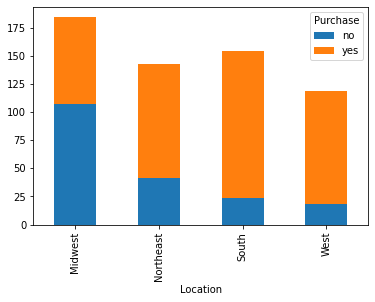

In [12]:
ax = pd.crosstab(index = myData.Location, columns = myData.Purchase).plot.bar(stacked = True)

The resulting stacked column chart looks similar to Figure 3.12 in the text. With some additional, albeit complex code we can also label the bars with the calculated frequencies if desired. Specifically, this requires using a **for** loop to calculate the coordinates and size of each patch using the matplotlib **get_xy**, **get_width**, and **get_height** functions, respectively, along with some basic algebra, and then subsequently using these locations to add the labels to the plot via the **text** function. Note that within the latter function, we use Python's **format** method to adjust the floating point value to a general format, which ultimately results in the frequency labels (which are based on the bar heights) being displayed as integers; similarly, we use the *ha* and *va* arguments of **text** to center both the horizontal and vertical alignment of the labels within the bars, respectively, and set the color to `'white'` to improve contrast. The necessary code is provided below:

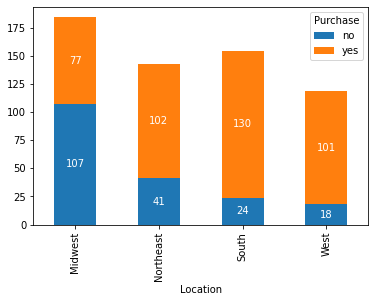

In [13]:
ax = pd.crosstab(index = myData.Location, columns = myData.Purchase).plot.bar(stacked = True)

for patch in ax.patches:
    x, y = patch.get_xy()
    ax.text(s = '{:g}'.format(patch.get_height()), 
            x = x + patch.get_width() / 2, 
            y = y + patch.get_height() / 2, 
            ha = 'center', 
            va = 'center', 
            color = 'white')

### Example 3.4

Recall the ***Growth_Value*** data set that contains annual returns for Fidelity's Growth and Value mutual funds from 1984 to 2018. Construct a scatterplot of Value against Growth using Python and then summarize the results.

**a.** Import the ***Growth_Value*** data into a Pandas DataFrame (table) and label it myData.

In [14]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch03_data.xlsx', sheet_name = 'Growth_Value')

myData.head()

Year  Growth  Value
0  1984   -5.50  -8.59
1  1985   39.91  22.10
2  1986   13.03  14.74
3  1987   -1.70  -8.58
4  1988   16.05  29.05

**b.** In order to construct a scatterplot, we use seaborn's **scatterplot** function with the relevant *x* and *y* coordinates and *data* variable:

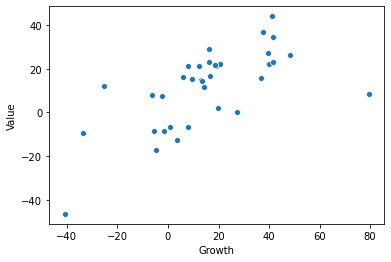

In [15]:
import seaborn as sns

sns.scatterplot(x = 'Growth', 
                y = 'Value', 
                data = myData);

The resulting scatterplot is similar to Figure 3.14 in the text. If desired, we can use seaborn's **despine** function along with matplotlib's **spines** and **set_position** to adjust the look further. For example:

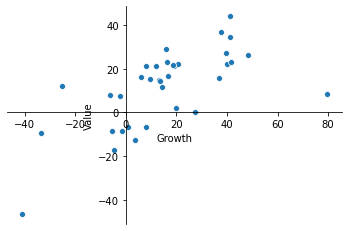

In [16]:
ax = sns.scatterplot(x = 'Growth', 
                     y = 'Value', 
                     data = myData)

sns.despine()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

The resulting figure more closely matches Figure 3.14 in the text.

### Example 3.5

The ***Birth_Life*** data file contains information on the following variables for 10 countries in 2010: country name (Country Name), life expectancy (Life Exp in years), birth rate (Birth Rate in percent), GNI per capita (GNI in \\$), and level of development (Development). A portion of the Birth_Life data set is shown in Table 3.13 below.

| Table 3.13 A Portion of the Birth_Life Data Set |
| --- |

| Country Name | Life Exp | Birth Rate | GNI | Development |
| --- | --- | --- | --- | --- |
| Congo, Dem. Rep. | 50.00 | 45.96 | 130 | Developing |
| India | 62.59 | 26.46 | 440 | Developing |
| ... | ... | ... | ... | ... |
| Japan | 81.08 | 9.40 | 36230 | Developed |

Use Python to construct a scatterplot of birth rate against life expectancy that also incorporates the Development variable (categorical). Summarize the results.

**a.** Import the ***Birth_Life*** data into a Pandas DataFrame (table) and label it myData.

In [17]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch03_data.xlsx', sheet_name = 'Birth_Life')

myData.head()

Country Name   Life Exp  Birth Rate   GNI Development
0  Congo, Dem. Rep.  50.002878      45.964   130  Developing
1             India  62.593390      26.463   440  Developing
2      South Africa  56.368317      24.329  3070  Developing
3             China  71.995585      14.030   940  Developing
4          Pakistan  62.758171      32.035   490  Developing

**b.** To create a scatterplot that incorporates the Development variable, we use seaborn's **scatterplot** function. Besides setting up the *x*, *y*, and *data* arguments as usual, we add the *hue* argument to color the points based on our categorical grouping variable, Development. Note that a legend is automatically added to the plot. Finally, we use the **set** function to adjust our x and y axis labels, i.e., *xlabel* and *ylabel*, respectively.

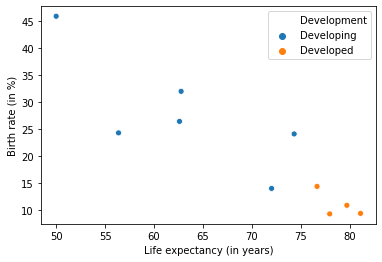

In [18]:
import seaborn as sns

ax = sns.scatterplot(x = 'Life Exp', 
                     y = 'Birth Rate', 
                     hue = 'Development', 
                     data = myData)

ax.set(xlabel = 'Life expectancy (in years)', 
       ylabel = 'Birth rate (in %)');

The resulting scatterplot closely resembles Figure 3.15 in the text.

### Example 3.6

Revisit the ***Birth_Life*** data from [Example 3.5](#Example-3.5) above. Use Python to construct a bubble plot of birth rate against life expectancy that uses the GNI variable for the size of the bubbles. Summarize the results.

**a.** Import the ***Birth_Life*** data into a Pandas DataFrame (table) and label it myData.

In [19]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch03_data.xlsx', sheet_name = 'Birth_Life')

myData.head()

Country Name   Life Exp  Birth Rate   GNI Development
0  Congo, Dem. Rep.  50.002878      45.964   130  Developing
1             India  62.593390      26.463   440  Developing
2      South Africa  56.368317      24.329  3070  Developing
3             China  71.995585      14.030   940  Developing
4          Pakistan  62.758171      32.035   490  Developing

**b.** To create a bubble plot we once again use seaborn's **scatterplot** function using similar code to [Example 3.5](#Example-3.5) part b above. Instead of *hue*, we use the *size* argument to adjust point sizes based on GNI. Moreover, we include a *sizes* argument to set the minimum and maximum point sizes to reasonable values (in this case, 10 and 4000, respectively), use *alpha* to add transparency, and use *color* to adjust the point color. Finally, we use the **set** function to adjust the axis labels and limits and use the **get_legend** and **remove** functions to remove the legend (which looks awkward with point sizes this large).

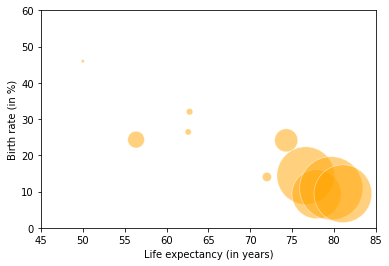

In [20]:
import seaborn as sns

ax = sns.scatterplot(x = 'Life Exp', 
                     y = 'Birth Rate', 
                     size = 'GNI', 
                     sizes = (10, 4000), 
                     color = 'orange', 
                     alpha = .5, 
                     data = myData)

ax.set(xlabel = 'Life expectancy (in years)', 
       ylabel = 'Birth rate (in %)', 
       xlim = (45, 85), 
       ylim = (0, 60))

ax.get_legend().remove()

The resulting bubble plot closely resembles Figure 3.16.

### Example 3.7

Recall the introductory case where data are provided on the annual returns (in \%) for Fidelity's Growth and Value mutual funds from 1984 to 2018. Use Python to construct line charts for Growth and Value. Summarize the results.

**a.** Import the ***Growth_Value*** data into a Pandas DataFrame (table) and label it myData.

In [21]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch03_data.xlsx', sheet_name = 'Growth_Value')

myData.head()

Year  Growth  Value
0  1984   -5.50  -8.59
1  1985   39.91  22.10
2  1986   13.03  14.74
3  1987   -1.70  -8.58
4  1988   16.05  29.05

**b.** Use the Pandas **plot** function to plot the lines by specifying Year as the *x* argument and a list of the two desired columns as the *y* argument (i.e., `['Growth', 'Value']`). A legend will automatically be added to the plot.

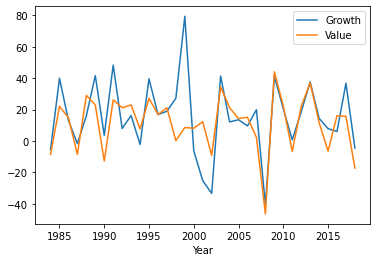

In [22]:
ax = myData.plot(x = 'Year', 
                 y = ['Growth', 'Value'])

**c.** To make the plot match Figure 3.17 in the text, we use **set** to adjust the y-axis label and move the x-axis spline using matplotlib's **spines** and **set_position** method. Finally, we rotate the x-axis tick labels with the **xticks** function, using a negative *rotation* value to rotate clockwise.

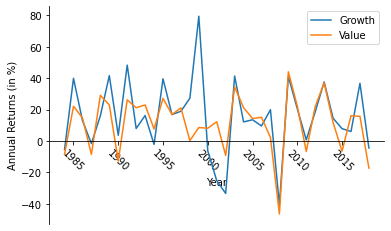

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = myData.plot(x = 'Year', 
                 y = ['Growth', 'Value'])

ax.set(ylabel = 'Annual Returns (in %)')

sns.despine()
ax.spines['bottom'].set_position('zero')
plt.xticks(rotation = -45);

### Example 3.8

A national bookstore chain is trying to understand customer preferences at various store locations. The marketing department has acquired a list of 500 of the most recent transactions from four of its stores. The data set includes the record number (Record), which one of its four stores sold the book (BookStore), and the type of book sold (BookType). The marketing department wants to visualize the data using a heat map to help it understand customer preferences at different stores. A portion of the ***Bookstores*** data set is shown in Table 3.14 below.

| Table 3.14 Transaction Results for Bookstore Example |
| --- |

| Record | BookStore | BookType |
| --- | --- | --- |
| 1 | Store2 | Biography |
| 2 | Store2 | Children book |
| ... | ... | ... |
| 500 | Store 4 | Romance |

Use Python to construct a heat map to visualize the sales of various types of books at different stores. Summarize the results.

**a.** Import the ***Bookstores*** data into a Pandas DataFrame (table) and label it myData.

In [24]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch03_data.xlsx', sheet_name = 'Bookstores')

myData.head()

Record BookStore       BookType
0       1    Store2      Biography
1       2    Store2  Children book
2       3    Store4        Sci-fi 
3       4    Store4   Travel guide
4       5    Store4  Children book

**b.** Similar to [Example 3.3](Example-3.3) part b, we first use the Pandas **crosstab** function to create a contingency table, although this time we *normalize* by `'index'` rather than by `'all'`. Note that in this case, all of the row totals will sum to 1 (i.e., 100\%), although we subsequently multiply our table by 100 to more closely match Figure 3.18 in the text.

In [25]:
myTable = pd.crosstab(index = myData.BookStore, 
                      columns = myData.BookType, 
                      normalize = 'index', 
                      margins = False)

myTable *= 100 # this is the same as myTable = myTable * 100

myTable

BookType   Biography  Children book   Romance     Sci-fi   Self help  \
BookStore                                                              
Store1     17.777778      17.777778  16.296296  18.518519   9.629630   
Store2     13.043478      20.000000  25.217391  14.782609  14.782609   
Store3     20.547945      15.753425   8.904110  19.178082  15.753425   
Store4     17.307692      14.423077  20.192308  20.192308  14.423077   

BookType   Travel guide  
BookStore                
Store1        20.000000  
Store2        12.173913  
Store3        19.863014  
Store4        13.461538

As an aside, note that you may choose to set *margins* to `True` to see the bottom row shown in Figure 3.18 in the text, although this may not be desirable for creating the actual plot (e.g., as shown in Figure 3.19). For example:

In [26]:
round(pd.crosstab(index = myData.BookStore, 
                  columns = myData.BookType, 
                  normalize = 'index', 
                  margins = True) * 100, 2)

BookType   Biography  Children book  Romance   Sci-fi   Self help  \
BookStore                                                           
Store1         17.78          17.78     16.30    18.52       9.63   
Store2         13.04          20.00     25.22    14.78      14.78   
Store3         20.55          15.75      8.90    19.18      15.75   
Store4         17.31          14.42     20.19    20.19      14.42   
All            17.40          17.00     17.00    18.20      13.60   

BookType   Travel guide  
BookStore                
Store1            20.00  
Store2            12.17  
Store3            19.86  
Store4            13.46  
All               16.80

**c.** We use seaborn's **heatmap** function to construct the heatmap using myTable. To include the labels, we set *annot* to `True` and format these values to 2 degrees past the decimal by setting *fmt* to `'.2f'`. Finally, we adjust the look of the heatmap from the default by setting *cmap* to one of matplotlib's default diverging [colormap sequences](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html), `'RdBu'`, which goes from red on the low end to blue on the high end, with white in the middle.  

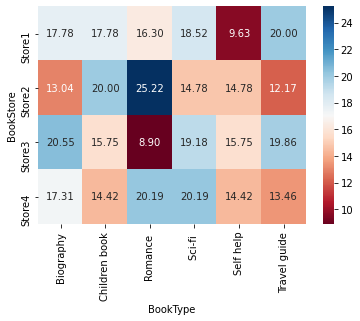

In [27]:
import seaborn as sns

ax = sns.heatmap(myTable, 
                 annot = True, 
                 fmt = '.2f', 
                 cmap = 'RdBu')

To further tweak the look, we can define a custom colormap using **from_list** in matplotlib's **colors.LinearSegmentedColormap**. Specifically, we set the colors to a list of values on the small, median, and high end, i.e., `['red', 'yellow', 'green'`], respectively, and place this is the variable RedYellowGreen, which we subsequently use in our *cmap*. Finally, we remove the x- and y-axis labels using **set** and adjust the rotation of the y-axis labels using **yticks** to more closely match Figure 3.19.

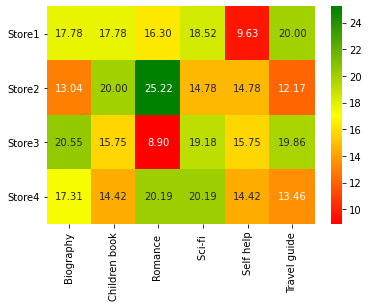

In [28]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

RedYellowGreen = colors.LinearSegmentedColormap.from_list(colors = ['red', 'yellow', 'green'], name = None)

ax = sns.heatmap(myTable, 
                 annot = True, 
                 fmt = '.2f', 
                 cmap = RedYellowGreen)

ax.set(xlabel = None,
       ylabel = None)

plt.yticks(rotation = 0);

### Example 3.9

Using Python, calculate the mean and the median for the Growth and the Value variables from the introductory case. Summarize the results.

#### Solution

Like Excel and R, Python has many built-in formulas or functions. In Python, we denote all function names in **boldface** and all options within a function in *italics*. An up-to-date list of basic descriptive/statistical functions in NumPy is available in the [NumPy Reference](https://numpy.org/doc/stable/reference/routines.statistics.html).

**a.** Import the ***Growth_Value*** data into a Pandas DataFrame (table) and label it myData.

In [29]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch03_data.xlsx', sheet_name = 'Growth_Value')

myData.head()

Year  Growth  Value
0  1984   -5.50  -8.59
1  1985   39.91  22.10
2  1986   13.03  14.74
3  1987   -1.70  -8.58
4  1988   16.05  29.05

**b.** The NumPy **mean** function will return the mean for a a specific variable in a Pandas DataFrame (table). In order to find the mean of the Growth variable, enter:

In [30]:
import numpy as np

np.mean(myData.Growth)

15.10742857142857

**c.** The Pandas **describe** function will return the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (i.e., the median), 75th percentile, and maximum for each variable in the DataFrame.

In [31]:
myData.describe()

Year     Growth      Value
count    35.000000  35.000000  35.000000
mean   2001.000000  15.107429  11.444571
std      10.246951  23.822771  17.919797
min    1984.000000 -40.900000 -46.520000
25%    1992.500000   2.130000   1.195000
50%    2001.000000  14.440000  15.090000
75%    2009.500000  31.995000  22.185000
max    2018.000000  79.480000  44.080000

Alternatively, use individual functions in NumPy to extract relevant statistics for a given column. For example, to calculate the median of Growth, use NumPy's **median** function:

In [32]:
np.median(myData.Growth)

14.44

The result matches the output from **describe** above.

### Example 3.13

Using Python, calculate the correlation coefficient between the Growth and the Value variables from the introductory case. Then summarize the results.

**a.** Import the ***Growth_Value*** data into a Pandas DataFrame (table) and label it myData.

In [33]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch03_data.xlsx', sheet_name = 'Growth_Value')

myData.head()

Year  Growth  Value
0  1984   -5.50  -8.59
1  1985   39.91  22.10
2  1986   13.03  14.74
3  1987   -1.70  -8.58
4  1988   16.05  29.05

**b.** The Pandas **cor** function will return a matrix that lists the correlation coefficient for each pairing of the variables in the DataFrame. Enter:

In [34]:
myData.corr()

Year    Growth     Value
Year    1.000000 -0.080719 -0.079093
Growth -0.080719  1.000000  0.657196
Value  -0.079093  0.657196  1.000000

We are interested in the correlation coefficient between Growth and Value, which appears twice in this matrix. We also see the value 1 along the diagonal of the matrix, which measures the correlation between each variable and itself. The correlation coefficient between Year and Growth and the correlation coefficient between Year and Value are meaningless in this application.

### Example 3.14

Use Python to construct a boxplot for the Growth and Value variables from the introductory case. Interpret the results.

**a.** Import the ***Growth_Value*** data into a Pandas DataFrame (table) and label it myData.

In [35]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch03_data.xlsx', sheet_name = 'Growth_Value')

myData.head()

Year  Growth  Value
0  1984   -5.50  -8.59
1  1985   39.91  22.10
2  1986   13.03  14.74
3  1987   -1.70  -8.58
4  1988   16.05  29.05

**b.** We use the Pandas **boxplot** function to plot the two desired columns in a single figure by passing them as a list to the *column* argument (i.e., `['Growth', 'Value']`). We also adjust the *vert* argument to `False` to create horizontal boxplots and use **set** to adjust the x-axis label (i.e., *xlabel*).

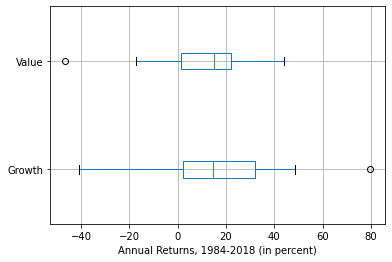

In [36]:
ax = myData.boxplot(column = ['Growth', 'Value'], 
                    vert = False)

ax.set(xlabel = "Annual Returns, 1984-2018 (in percent)");

The resulting figure closely matches Figure 3.22 in the text.

**c.** To treat outliers, we adjust the code above by setting the *return_type* to `'dict'` and store the result in the variable PlotDict. Afterwards, display the plot using **show** and subsequently iterate across PlotDict to find each of the outliers (i.e., fliers) across each boxplot within the figure.

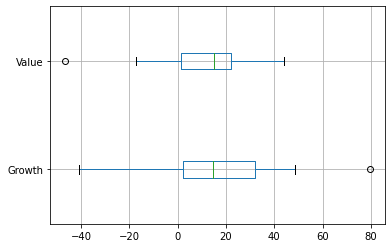

[array([79.48]), array([-46.52])]

In [37]:
import matplotlib.pyplot as plt

PlotDict = myData.boxplot(column = ['Growth', 'Value'], 
                          vert = False, 
                          return_type = 'dict')

plt.show()

PlotFliers = [flier.get_xdata() for flier in PlotDict['fliers']]

PlotFliers

Ultimately, we end up with a list of arrays with the outliers for Growth and Value, respectively. Note that the order of the list is identical to the order in which the *column* argument was specified (i.e., Growth followed by Value in the list).

**d.** One approach to treat outliers in Python is to replace them with NumPy `nan` values, which represent missing cases. We can substitute the outliers we saw above using the NumPy **in1d** function, which takes the original data and the outliers to remove as its two arguments. This function produces an array of boolean values, which we can use with the NumPy **where** function to replace the outliers with NumPy `nan` values (i.e., `np.nan`), which we store in updated columns, newGroth and newValue.

In [38]:
import numpy as np

myData['newGrowth'] = np.where(np.in1d(myData.Growth, PlotFliers[0]), np.nan, myData.Growth)
myData['newValue'] = np.where(np.in1d(myData.Value, PlotFliers[1]), np.nan, myData.Value)

Verify that the newGrowth observation for the year 1999 and the newValue observation for the year 2008 are now `nan` using the Pandas **query** function. Note: with outliers replaced with `nan`, we have the option to implement the omission and the imputation strategies for treatment of missing values described in Section 2.4.

In [39]:
myData.query('Year == 1999 | Year == 2008')

Year  Growth  Value  newGrowth  newValue
15  1999   79.48   8.55        NaN      8.55
24  2008  -40.90 -46.52      -40.9       NaN

**e.** Once the outliers are replaced with `nan`, we can recalculate summary measures. We use the Pandas **describe** function to compare the means of the original variables with outliers and the new variables without outliers. Enter:

In [40]:
myData.describe()

Year     Growth      Value  newGrowth   newValue
count    35.000000  35.000000  35.000000  34.000000  34.000000
mean   2001.000000  15.107429  11.444571  13.214118  13.149412
std      10.246951  23.822771  17.919797  21.341470  15.034645
min    1984.000000 -40.900000 -46.520000 -40.900000 -17.340000
25%    1992.500000   2.130000   1.195000   1.400000   3.565000
50%    2001.000000  14.440000  15.090000  13.970000  15.380000
75%    2009.500000  31.995000  22.185000  25.560000  22.227500
max    2018.000000  79.480000  44.080000  48.330000  44.080000

Verify that the means of the newGrowth and newValue variables are approximately 13.21 and 13.15, respectively, and that they are different from the means of the original Growth and Value variables.